In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd

# Ejercicio 1

## Generar una muestra de una normal

In [24]:
# Ejercicio 1 
# Simular una normal
def sample_normal(m=0,s=1,N=100,seed=12):
    rv = stats.norm(loc=m,scale=1)
    return rv.rvs(N,random_state=seed)

In [25]:
random_sample = sample_normal(m=0,s=1,N=100,seed=12)

## Calcular kurtosis y skewness

In [27]:
# Encontrar kurtosis y skewness con funciones
def rv_moment(sample,moment=1):
    """
    Parameters
    ----------
    sample : np.array
        Muestra de una VA.
    moment : int, optional
        Momento empírico a calcular. The default is 1.
            0 : 1
            1 : Valor esperado
            2 : --
            3 : Kurtosis
            4 : Skewness

    Returns
    -------
    float
        El momento <moment> empírico de la muestra.
    """
    m_muestral = np.mean(sample)
    s_muestral = np.std(sample)
    muestra_normalizada = (sample - m_muestral) / s_muestral
    return np.mean( muestra_normalizada ** moment)

In [28]:
kurt = rv_moment(random_sample,moment=3)
skew = rv_moment(random_sample,moment=4)

In [34]:
kurt,skew

(0.05470178363174698, 3.278347828922082)

# IQR

In [44]:
def get_iqr(sample):
    sorted_sample = np.sort(sample)
    q1_index = int(.25*len(sorted_sample))
    q3_index = int(.75*len(sorted_sample))
    return sorted_sample[q3_index] - sorted_sample[q1_index] 
    

In [58]:
get_iqr(random_sample)

1.228285744458677

## Estimar desvío con rango de mediciones

In [46]:
def std_est(sample):
    return (max(sample)-min(sample)) /4
    

In [57]:
std_est(random_sample)

1.5048089791332242

## Plot de box-and-whiskers

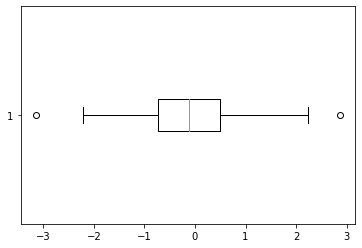

In [51]:
plt.boxplot(random_sample,vert=False)
plt.show()

# Ejercicio 2 

In [54]:
rv_exp = stats.expon(1)

In [56]:
exp_sample = rv_exp.rvs(100)

## Kurtosis y Skewness

In [59]:
kurt = rv_moment(exp_sample,moment=3)
kurt

1.3395000446048904

In [60]:
skew = rv_moment(exp_sample,moment=4)
skew

4.168791115638296

## IQR

In [61]:
get_iqr(exp_sample)

1.1090392145080517

## box-and-whiskers

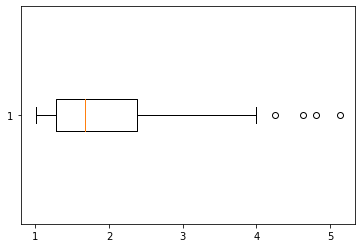

In [63]:
plt.boxplot(exp_sample,vert=False)
plt.show()

# Ejercicio 3

In [7]:
amzn = pd.read_csv('AMZN.csv')
amzn.loc[:,'date_'] = pd.to_datetime(amzn.Date)

In [8]:
goog = pd.read_csv('GOOG.csv')
goog.loc[:,'date_'] = pd.to_datetime(goog.Date)

In [9]:
amzn.head()

,Date,Open,High,Low,Close,Adj Close,Volume,date_
0,2020-11-09,3231.030029,3289.000000,3112.110107,3143.739990,3143.739990,7190400,2020-11-09
1,2020-11-10,3095.020020,3114.000000,3019.479980,3035.020020,3035.020020,6591000,2020-11-10
2,2020-11-11,3061.780029,3139.149902,3050.000000,3137.389893,3137.389893,4366900,2020-11-11
3,2020-11-12,3159.949951,3175.879883,3086.050049,3110.280029,3110.280029,4362000,2020-11-12
4,2020-11-13,3122.000000,3141.719971,3085.389893,3128.810059,3128.810059,3756200,2020-11-13


In [10]:
goog.head()

,Date,Open,High,Low,Close,Adj Close,Volume,date_
0,2020-05-08,1383.130005,1398.760010,1375.479980,1388.369995,1388.369995,1386900,2020-05-08
1,2020-05-11,1378.280029,1416.530029,1377.151978,1403.260010,1403.260010,1412100,2020-05-11
2,2020-05-12,1407.119995,1415.000000,1374.770020,1375.739990,1375.739990,1390600,2020-05-12
3,2020-05-13,1377.050049,1385.482056,1328.400024,1349.329956,1349.329956,1812600,2020-05-13
4,2020-05-14,1335.020020,1357.420044,1323.910034,1356.130005,1356.130005,1603100,2020-05-14


## Amazon

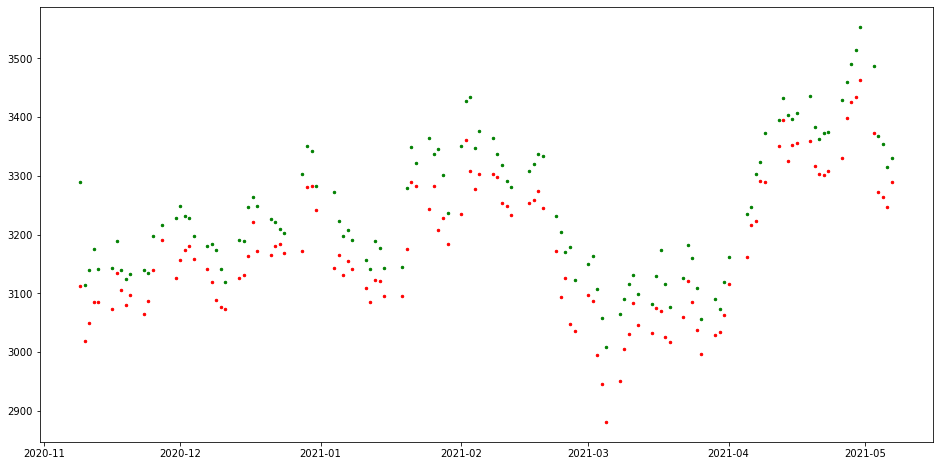

In [11]:
f, ax = plt.subplots(figsize=(16,8))
scat_high = ax.scatter(x=amzn.date_,y=amzn.High,color='green',label='High',s=6)
scat_low = ax.scatter(x=amzn.date_,y=amzn.Low,color='red',label='Low',s=6)

plt.show()

In [40]:
dataAMZN = pd.DataFrame()
for i in range(0,len(amzn)-20):
    dataAMZN=dataAMZN.append(pd.Series(amzn.loc[i:i+19,'High'].values),ignore_index=True)
    

In [41]:
for i in range(1,20,1):
    dataAMZN.loc[:,i] = dataAMZN.loc[:,i]/dataAMZN.loc[:,0] > 1.02

In [42]:
dataAMZN.loc[:,'marcaBernoulli'] = dataAMZN.loc[:,1:19].any(axis=1)

Sea el evento E: "El precio de la acción comprada llega a un precio un 2% superior al precio de compra dentro de los 20 días de la compra", bajo los siguientes supuestos:
* Se compra al precio mínimo de la jornada
* Se vende en al precio máximo de la jornada, el día que se alcanza el 2% de ganancia con ese máximo
* Las observaciones son iid

Entonces tenemos 104 realizaciones de nuestro expiremento Bernoulli que toma valor 1 si el evento sucede o 0, si no. 

Podemos estimar $\theta \sim \hat{\theta} = \frac{1}{N} \Sigma \mathbb{1}_{Evento} = \frac{78}{104} = 0.75$

Y por lo tanto, la probabilidad estimada de obtener esa ganancia es de 75% para AMZN.

## Google

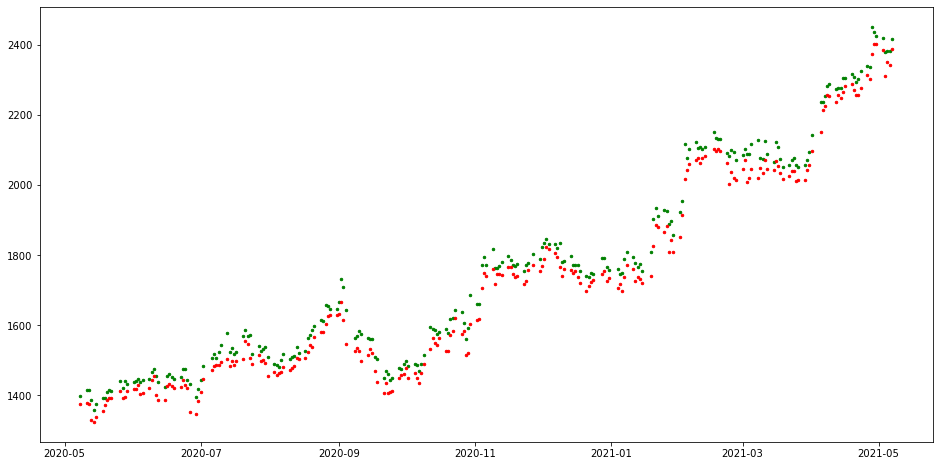

In [44]:
f, ax = plt.subplots(figsize=(16,8))
scat_high = ax.scatter(x=goog.date_,y=goog.High,color='green',label='High',s=6)
scat_low = ax.scatter(x=goog.date_,y=goog.Low,color='red',label='Low',s=6)

plt.show()

In [45]:
dataGOOG = pd.DataFrame()
for i in range(0,len(goog)-20):
    dataGOOG=dataGOOG.append(pd.Series(goog.loc[i:i+19,'High'].values),ignore_index=True)
    

In [46]:
for i in range(1,20,1):
    dataGOOG.loc[:,i] = dataGOOG.loc[:,i]/dataGOOG.loc[:,0] > 1.02

In [47]:
dataGOOG.loc[:,'marcaBernoulli'] = dataGOOG.loc[:,1:19].any(axis=1)

In [50]:
dataGOOG.marcaBernoulli.sum(),len(dataGOOG),dataGOOG.marcaBernoulli.sum()/len(dataGOOG)

(195, 232, 0.8405172413793104)

Para el caso de GOOG para el período muestreado, se tiene **$\hat{\theta} = 0.84$**, es decir, una **probabilidad de 84%** de poder obtener una ganancia del 2% dentro de los 20 días de la compra. 

## Comentarios finales

Este ejercicio de análisis bursátil presenta algunas limitaciones importantes para una verdadera operación y como modelo en sí mismo. Se comentan las principales:
Para comenzar, se asume la independencia de las observaciones, lo cual no es correcto por varias razones, como la influencia que tiene un día de operaciones sobre las decisiones de los compradores/vendedores en la jornada siguiente. Al mismo tiempo, la manera en que se construyen las observaciones de 20 días tienen un alto grado de superposición.
Por otro lado, la estrategia de operación tampoco está definida de manera completa o realista. El modelo asume la compra al mínimo del primer día de observación y la venta en el primer máximo que opere por encima del 2% de ese precio de compra. 